In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
#this command will force all plots to be generated as static images. Github does not support/ render interactive plots.
# https://discourse.holoviz.org/t/render-hvplot-in-jupyter-notebooks-on-github-with-bokeh-backend/5202/5
hvplot.extension("matplotlib")

In [2]:
# using this to repress warning messages about running KMeans on Windows. (https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)
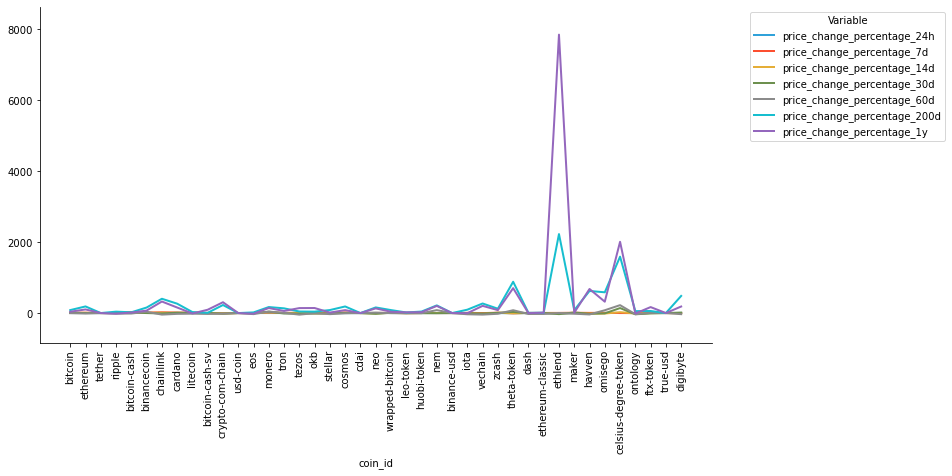

In [36]:
# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=1000,
    height=500,
    rot=90
)

plot

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data) #Module 19; Lesson 2; Activity 3; scaling_data_solution.ipynb



In [7]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data, columns = list(df_market_data.columns))

# Copy the crypto names from the original DataFrame
scaled_market_data_df["coin_id"] = df_market_data.index

# Set the coin_id column as index
scaled_market_data_df = scaled_market_data_df.set_index('coin_id')

# Display the scaled DataFrame
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_list1 = list(range(1,11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k_list1:
    # Module 19; Lesson 2; Activity 1; elbow_warmup_solution.ipynb
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(scaled_market_data_df)
    inertia.append(k_model.inertia_)
    


In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_list1, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

:Curve   [k]   (inertia)
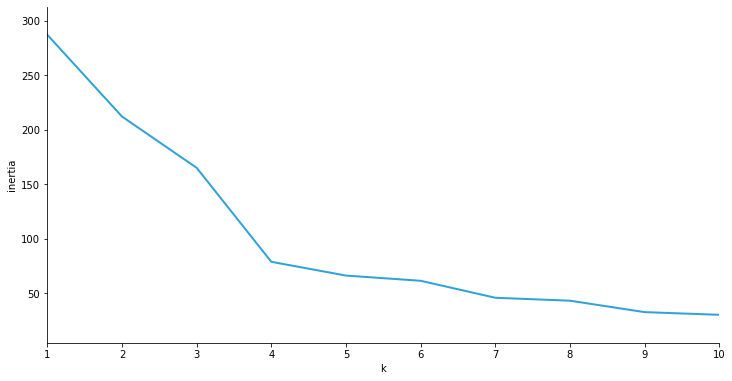

In [39]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
elbow1 = elbow_df.hvplot.line(
    x = "k",
    y = "inertia",
    xticks = k_list1,
    width=1000,
    height=500,
)

elbow1

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the plotted inertia data, the elbow curve indicates that four clusters is optimal for this data set.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters = 4, random_state = 1)


In [13]:
# Fit the K-Means model using the scaled DataFrame
k_model.fit(scaled_market_data_df)

print("--------------")

--------------


In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_ids = k_model.predict(scaled_market_data_df)

# Print the resulting array of cluster values.
print(cluster_ids)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_market_data_df_copy["cluster_id"] = cluster_ids

# Display the copy of the scaled DataFrame
scaled_market_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_id
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


:NdOverlay   [cluster_id]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
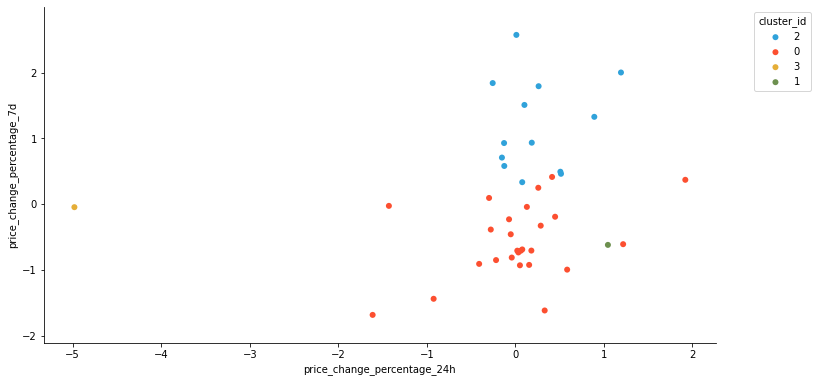

In [45]:
# Create a scatter plot using hvPlot by setting: 
# 1) `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# 2) Color the graph points with the labels found using K-Means.
# 3) Add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

clusters1 = scaled_market_data_df_copy.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = "cluster_id",
    hover_cols = "coin_id",
    width=1000,
    height=500
)

clusters1

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components = 3)

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame down to three principal components.
crypto_pca = pca_model.fit_transform(scaled_market_data_df)

# View the scaled PCA data
print(crypto_pca)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [20]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print(f"PC1 explained variance ratio: {explained_variance[0]}")
print(f"PC1 explained variance ratio: {explained_variance[1]}")
print(f"PC1 explained variance ratio: {explained_variance[2]}")
print(f"Total explained variance of PC1, PC2 and PC3: {sum(explained_variance)}")

PC1 explained variance ratio: 0.37198560327454366
PC1 explained variance ratio: 0.34700812751851634
PC1 explained variance ratio: 0.17603792623792405
Total explained variance of PC1, PC2 and PC3: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal componenets is approxmiately 0.895.

In [21]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns = ["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original scaled DataFrame
coin_ids = scaled_market_data_df.index

# Set the coin_id column as index
crypto_pca_df = crypto_pca_df.set_index(coin_ids)


# Display the scaled PCA DataFrame
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11
k_list2 = list(range(1,11))

In [23]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_list2:
    model = KMeans(n_clusters = i, random_state = 1)
    model.fit(crypto_pca_df)
    inertia2.append(model.inertia_)


In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k_list2, "inertia": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_dict)

:Curve   [k]   (inertia)
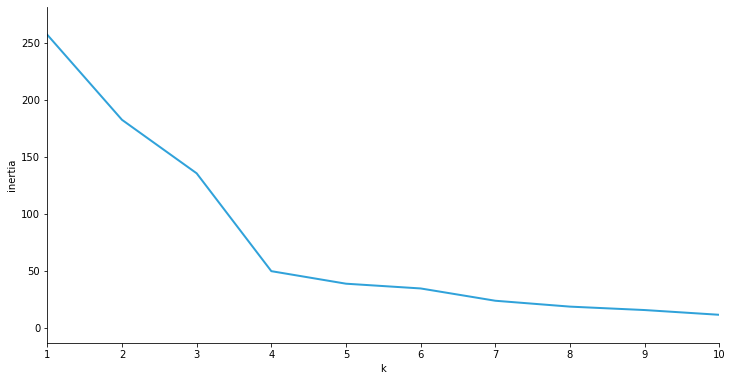

In [44]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
elbow2 = elbow_df2.hvplot.line(
    x = "k",
    y = "inertia",
    width=1000,
    height=500
)

elbow2

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Using the elbow method, it appears that the optimal number of clusters, using the PCA data, is four.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the optimal number of clusters (k = 4) for the PCA data does not differ from the optimal number of clusters for the original (scacled) data. However inertia at k=4 in elbow2 is lower than in elbow1.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
pca_kmeans_model = KMeans (n_clusters = 4, random_state = 1)

In [27]:
# Fit the K-Means model using the PCA data
pca_kmeans_model.fit(crypto_pca_df)
print("-------------")

-------------


In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_data_predictions = pca_kmeans_model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(pca_data_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the scaled PCA DataFrame
crypto_pca_df_copy = crypto_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
crypto_pca_df_copy["cluster_prediction"] = pca_data_predictions

# Display the copy of the scaled PCA DataFrame
crypto_pca_df_copy.head()

,PC1,PC2,PC3,cluster_prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


:NdOverlay   [cluster_prediction]
   :Scatter   [PC1]   (PC2,coin_id)
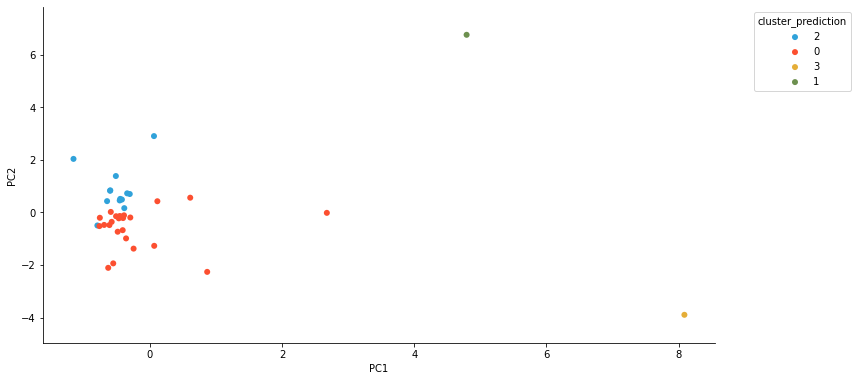

In [43]:
# Create a scatter plot using hvPlot by setting:
# 1) `x="PC1"` and `y="PC2"`.
# 2) Color the graph points with the labels found using K-Means.
# 3) Add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.
clusters2 = crypto_pca_df_copy.hvplot.scatter(
    x = "PC1",
    y = "PC2",
    by = "cluster_prediction",
    hover_cols = "coin_id",
    width=1000,
    height=500
)

clusters2

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)
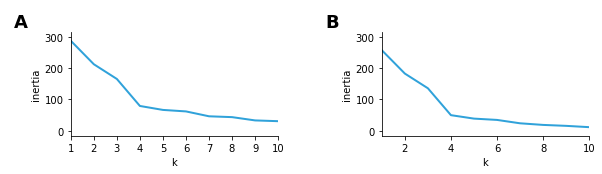

In [46]:
# Composite plot to contrast the two Elbow curves
composite_elbows = elbow1 + elbow2
composite_elbows

:Layout
   .NdOverlay.I  :NdOverlay   [cluster_id]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster_prediction]
      :Scatter   [PC1]   (PC2,coin_id)
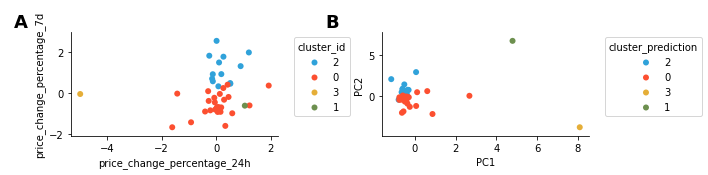

In [47]:
# Composite plot to contrast the clusters
composite_clusters_plots = clusters1 + clusters2
composite_clusters_plots

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reducing dimensions using principal componenet analysis creates a visually tighter K-Means clusters, compared to the clusters generated using the original (scaled) data. 